In [2]:
import pandas as pd
df = pd.read_csv('./Data/data.txt')

In [3]:
df

,col1,col2,col3,col4,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


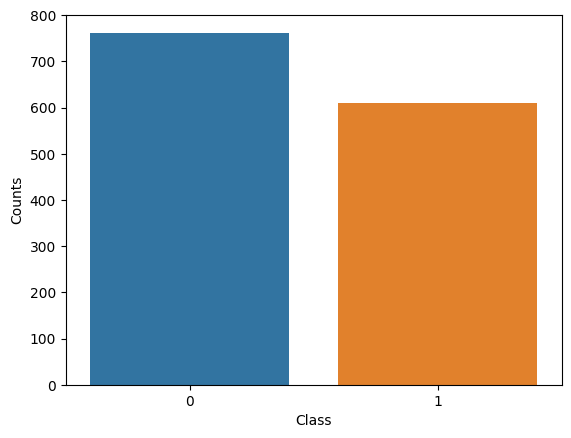

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="class", data=df)
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

In [5]:
import numpy as np
from sklearn import preprocessing
    
x=df.to_numpy()[:,0:-1]
y=df.to_numpy()[:,-1]

import collections
collections.Counter(y)

Counter({0.0: 762, 1.0: 610})

In [6]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [7]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=15) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]


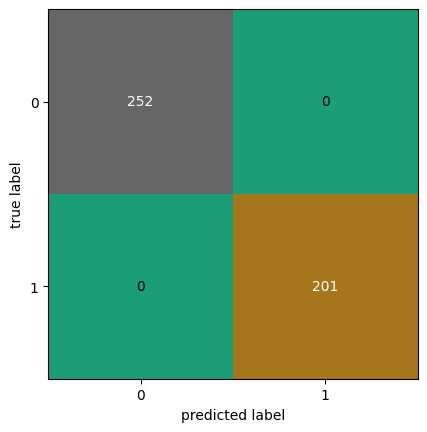

In [8]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [9]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       252
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

